In [ ]:
#Group 8 - Wk1 - Word Cloud
#Group Member: Athena Zhang, Pratheek Praveen Kumar, Weifeng Li, Wenke Yu, Ziqiao Wei

In [1]:
!pip install wordcloud

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk import wordnet
from nltk import RegexpTokenizer

import matplotlib.pyplot as plt

In [3]:
# Load in the dataframe
df = pd.read_csv("C:/Users/student/Desktop/BANA 275 NLP/Weekly Activity/W1/covid19_small-1.csv", index_col=0)

In [4]:
# Looking at first 5 rows of the dataset
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
1213,xfoqd6uk,815f653470c57a95b92e3857d8f5d038b4000d99,biorxiv,Processing of the SARS-CoV pp1a/ab nsp7-10 region,10.1101/860049,NaN,NaN,biorxiv,1.1.AbstractSevere acute respiratory syndrome ...,12/3/19,Boris Krichel; Sven Falke; Rolf Hilgenfeld; La...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/860049
931,6s27v6at,58bc0f2712ea1ced1f886c9fdd17b8cf014e66cb,biorxiv,The Influence Of Social Behavior On Competitio...,10.1101/293936,NaN,NaN,biorxiv,1AbstractInfectious disease interventions like...,4/4/18,Joe Pharaon; Chris T. Bauch,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/293936
1203,03uonbrv,30457ee3ce0001f33938fbc246b4ce4eacd74f5d,biorxiv,ZODIAC: database-independent molecular formula...,10.1101/842740,NaN,NaN,biorxiv,1AbstractThe confident high-throughput identif...,11/16/19,Marcus Ludwig; Louis-Félix Nothias; Kai Dührko...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/842740
365,nbu6bsb3,7207df5b61e93fa5a2b6e720c91aed05270e81be,biorxiv,A simple magnetic nanoparticles-based viral RN...,10.1101/2020.02.22.961268,NaN,NaN,biorxiv,1AbstractThe ongoing outbreak of the novel cor...,2/27/20,Zhen Zhao; Haodong Cui; Wenxing Song; Xiaoling...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.22.961268
727,xqs4baou,98629ae2533d73afbb0f5ef9d0cc813bf3afa851,medrxiv,Analysis of Epidemic Situation of New Coronavi...,10.1101/2020.03.15.20036756,NaN,NaN,medrvix,1Summary 1.1 Background The outbreak of the ne...,3/20/20,Xiaofeng Ji; Zhou Tang; Kejian Wang; Xianbin L...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.15.20036756


In [5]:
df[["source_x","title", "abstract","authors"]].head()

,source_x,title,abstract,authors
1213,biorxiv,Processing of the SARS-CoV pp1a/ab nsp7-10 region,1.1.AbstractSevere acute respiratory syndrome ...,Boris Krichel; Sven Falke; Rolf Hilgenfeld; La...
931,biorxiv,The Influence Of Social Behavior On Competitio...,1AbstractInfectious disease interventions like...,Joe Pharaon; Chris T. Bauch
1203,biorxiv,ZODIAC: database-independent molecular formula...,1AbstractThe confident high-throughput identif...,Marcus Ludwig; Louis-Félix Nothias; Kai Dührko...
365,biorxiv,A simple magnetic nanoparticles-based viral RN...,1AbstractThe ongoing outbreak of the novel cor...,Zhen Zhao; Haodong Cui; Wenxing Song; Xiaoling...
727,medrxiv,Analysis of Epidemic Situation of New Coronavi...,1Summary 1.1 Background The outbreak of the ne...,Xiaofeng Ji; Zhou Tang; Kejian Wang; Xianbin L...


In [6]:
# Groupby by source
source = df.groupby("source_x")

# Summary statistic of all source
source.describe().head()

pubmed_id                                                        \
             count          mean            std         min          25%   
source_x                                                                   
CZI           19.0  3.199593e+07  357893.072783  30531947.0  32018211.50   
PMC          111.0  1.547119e+07  762976.955199  12525263.0  15315928.50   
WHO          238.0  3.201347e+07  706491.805841  23075143.0  32061199.25   
biorxiv        0.0           NaN            NaN         NaN          NaN   
medrxiv        0.0           NaN            NaN         NaN          NaN   

                                             Microsoft Academic Paper ID  \
                 50%         75%         max                       count   
source_x                                                                   
CZI       32100485.0  32120867.5  32134861.0                        43.0   
PMC       15703085.0  15916855.5  16176577.0                         0.0   
WHO       32100978.5  32129564.5  32179910.0                       359.0   
biorxiv          NaN         NaN         NaN                         0.0   
medrxiv          NaN         NaN         NaN                         0.0   

                                                                  \
                  mean           std           min           25%   
source_x                                                           
CZI       2.853527e+09  3.305818e+08  1.757890e+09  2.952287e+09   
PMC                NaN           NaN           NaN           NaN   
WHO       2.666141e+09  4.966112e+08  3.912630e+07  2.304894e+09   
biorxiv            NaN           NaN           NaN           NaN   
medrxiv            NaN           NaN           NaN           NaN   

                                                    
                   50%           75%           max  
source_x                                            
CZI       3.003639e+09  3.005800e+09  3.006672e+09  
PMC                NaN           NaN           NaN  
WHO       3.000244e+09  3.005575e+09  3.006672e+09  
biorxiv            NaN           NaN           NaN  
medrxiv            NaN           NaN           NaN

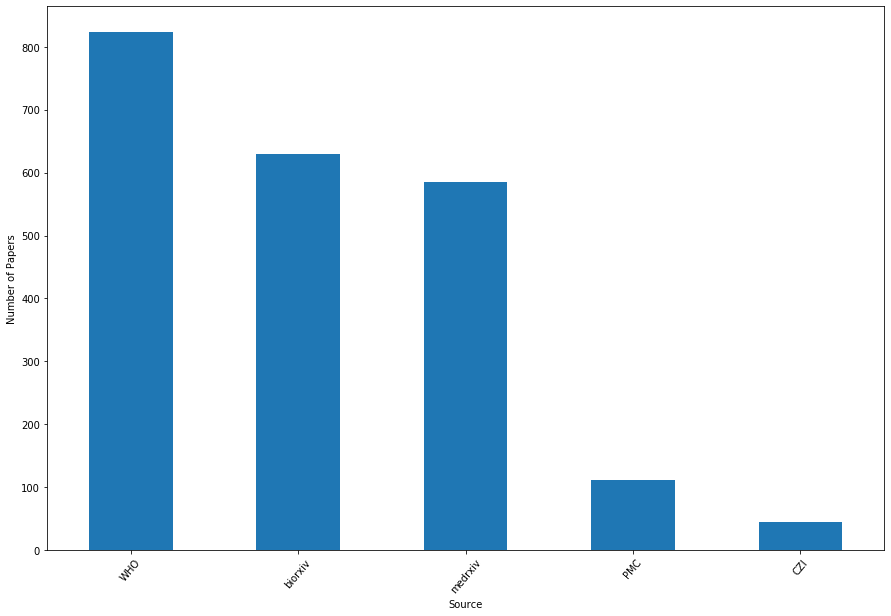

In [7]:
plt.figure(figsize=(15,10))
source.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Source")
plt.ylabel("Number of Papers")
plt.show()

In [8]:
print(df.abstract[1])

An emerging disease is one infectious epidemic caused by a newly transmissible pathogen, which has either appeared for the first time or already existed in human populations, having the capacity to increase rapidly in incidence as well as geographic range. Adapting to human immune system, emerging diseases may trigger large-scale pandemic spreading, such as the transnational spreading of SARS, the global outbreak of A(H1N1), and the recent potential invasion of avian influenza A(H7N9). To study the dynamics mediating the transmission of emerging diseases, spatial epidemiology of networked metapopulation provides a valuable modeling framework, which takes spatially distributed factors into consideration. This review elaborates the latest progresses on the spatial metapopulation dynamics, discusses empirical and theoretical findings that verify the validity of networked metapopulations, and the application in evaluating the effectiveness of disease intervention strategies as well.


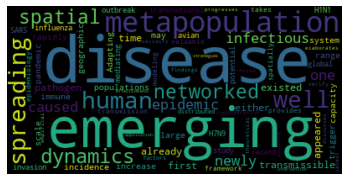

In [9]:
# Start with one paper:
text = df.abstract[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
print(text)

An emerging disease is one infectious epidemic caused by a newly transmissible pathogen, which has either appeared for the first time or already existed in human populations, having the capacity to increase rapidly in incidence as well as geographic range. Adapting to human immune system, emerging diseases may trigger large-scale pandemic spreading, such as the transnational spreading of SARS, the global outbreak of A(H1N1), and the recent potential invasion of avian influenza A(H7N9). To study the dynamics mediating the transmission of emerging diseases, spatial epidemiology of networked metapopulation provides a valuable modeling framework, which takes spatially distributed factors into consideration. This review elaborates the latest progresses on the spatial metapopulation dynamics, discusses empirical and theoretical findings that verify the validity of networked metapopulations, and the application in evaluating the effectiveness of disease intervention strategies as well.


In [11]:
# Save the image in the img folder:
wordcloud.to_file("first_abstract.png")

In [12]:
text = " ".join(paper for paper in df.abstract)
print ("There are {} words in the combination of all papers.".format(len(text)))

There are 3042820 words in the combination of all papers.


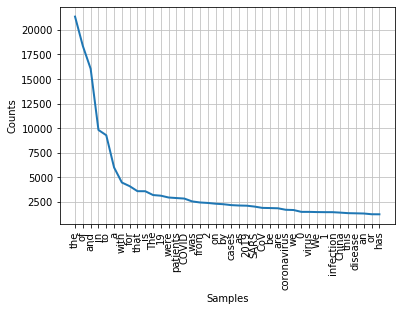

In [13]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(40)

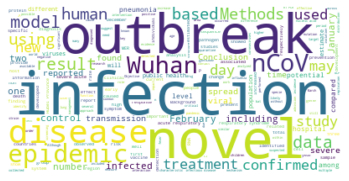

In [14]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['patient', 'patients', 'China', 'case', 'cases','method', 'COVID', 'CoV', 'coronavirus', 'virus', 'SARS'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
covid_mask = np.array(Image.open("virus.png"))
covid_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [17]:
# Transform your mask into a new one that will work with the function:
transformed_covid_mask = np.ndarray((covid_mask.shape[0],covid_mask.shape[1]), np.int32)

for i in range(len(covid_mask)):
    transformed_covid_mask[i] = list(map(transform_format, covid_mask[i]))

In [18]:
# Check the expected result of your mask
transformed_covid_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

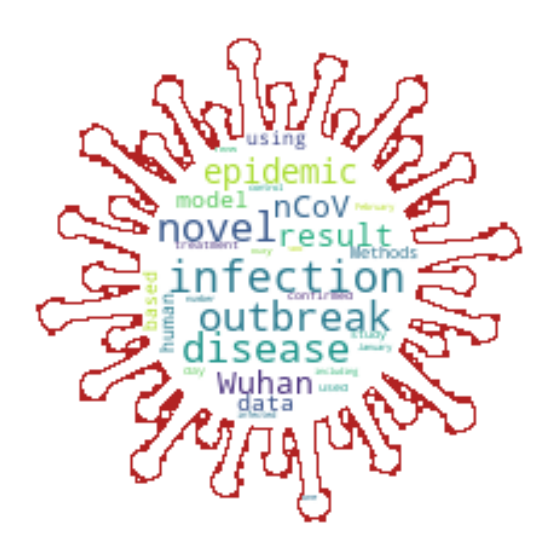

In [19]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_covid_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("covid.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Our findings: 
#1. WHO provides the most papers regarding COVID-19.
#2. From the word cloud image, we found the words that appear most frequently among all abstracts are infection and outbreak
#   which are the primary influences of COVID-19. 
#3. Other words that appeared in the word cloud like: novel, nCoV, emerging or newly, also showed us the COVID-19 virus
#   is new to human and it's the first time it causes epidemic. 